In [1]:
# important Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load red_wine_quality dataset

df = sns.load_dataset('iris')

In [3]:
# First five rows

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# rows and columns

df.shape

(150, 5)

In [5]:
# basic info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# Basic stats

df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# find correlation

df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [11]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
# Type of species

df['species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

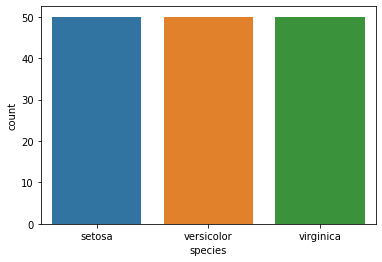

In [14]:
sns.countplot(x=df['species']);

#### Observation
1. Each species (setosa, versicolor, virginica) has 50 as it’s count

In [15]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

## Uni-variate Analysis

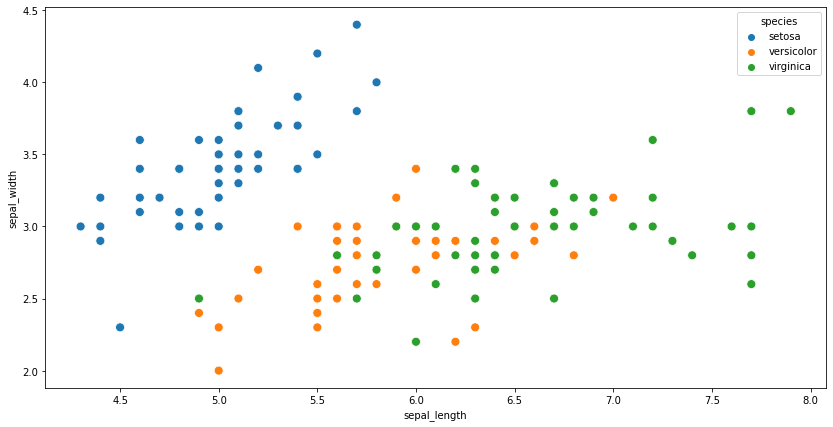

In [34]:
# Compare Sepal Length and Sepal Width
plt.rcParams['figure.figsize'] = (14, 7)
sns.scatterplot(x="sepal_length", y="sepal_width", hue="species", data=df, s=80);

#### Observations
1. Iris Setosa species has smaller sepal length but higher width.
2. Versicolor lies in almost middle for length as well as width
3. Virginica has larger sepal lengths and smaller sepal widths

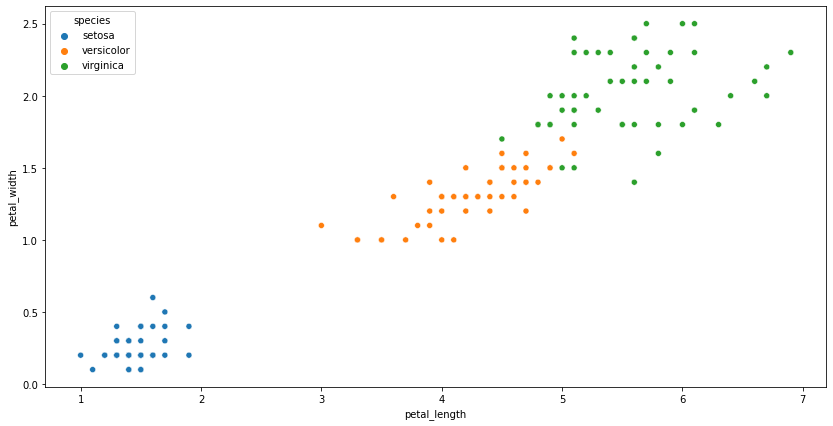

In [35]:
# compare petal length and petal width
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=df);

#### Observation
1. Setosa species have the smallest petal length as well as petal width.
2. Versicolor species have average petal length and petal width.
3. Virginica species have the highest petal length as well as petal width.

## Bi-variate Analysis

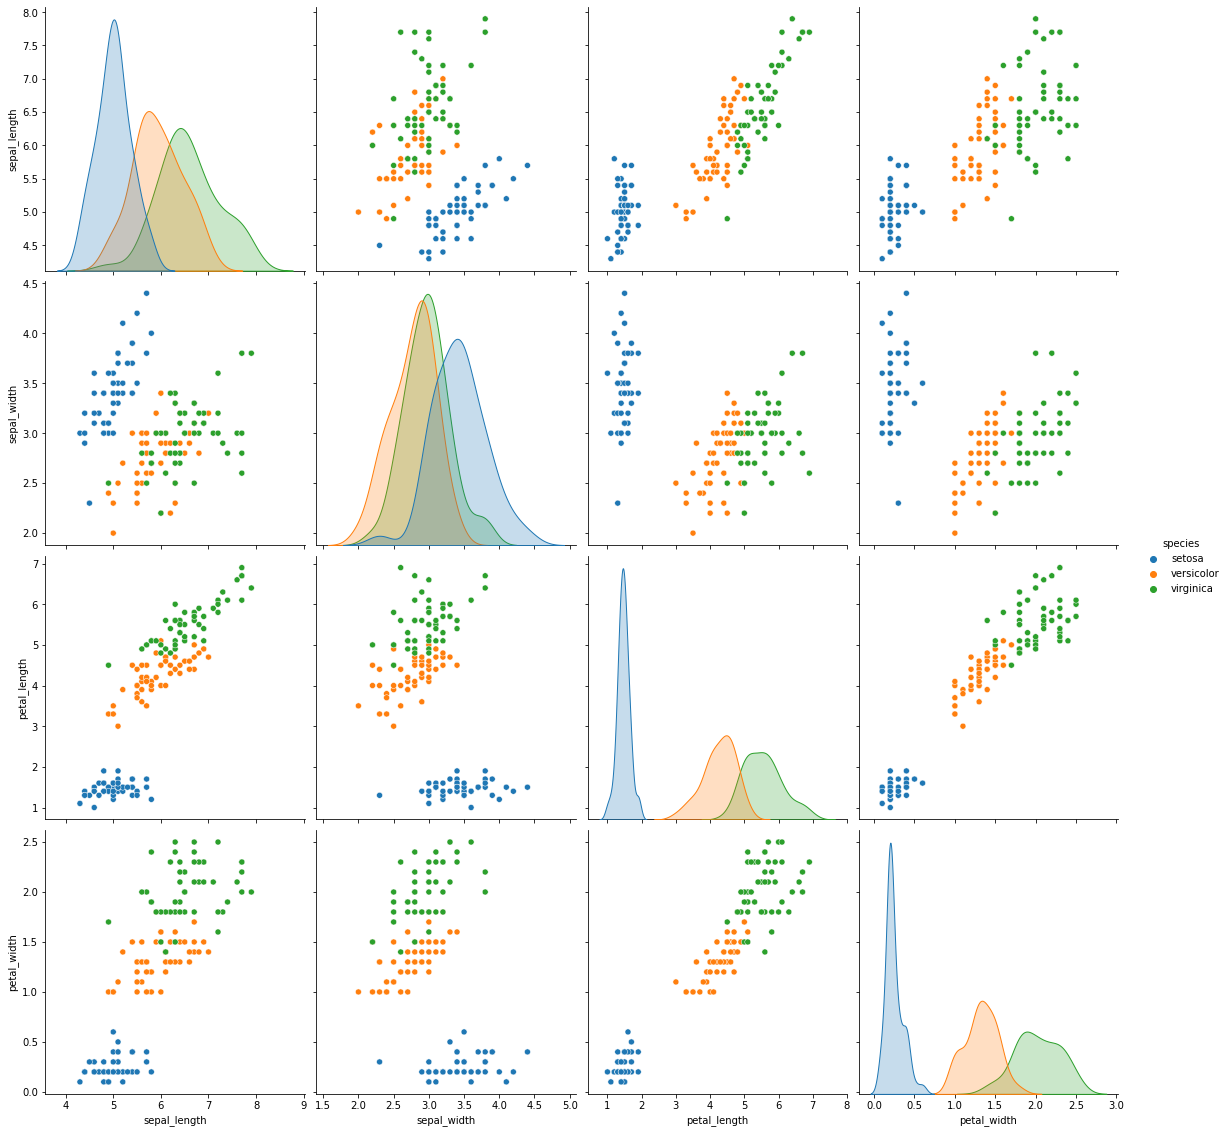

In [39]:
sns.pairplot(df, hue='species', height=4);

#### Observations
1. High co relation between petal length and width columns.
2. Setosa has both low petal length and width.
3. Versicolor has both average petal length and width
4. Virginica has both high petal length and width.
5. Sepal width for setosa is high and length is low.
6. Versicolor have average values for for sepal dimensions.
7. Virginica has small width but large sepal length.

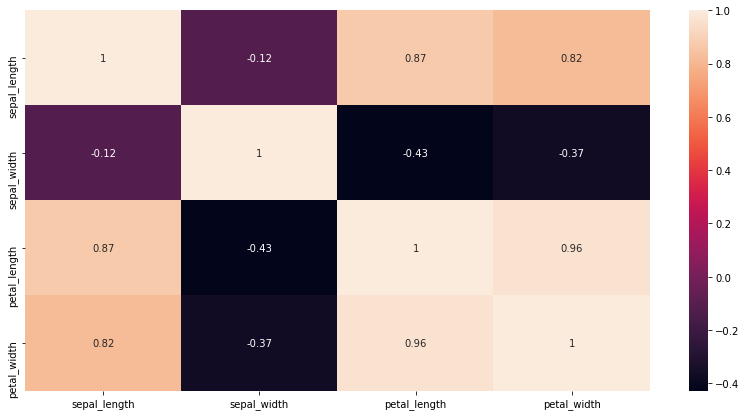

In [40]:
# Check Correlation

sns.heatmap(df.corr(), annot=True);

#### Observation
1. Sepal Length and Sepal Width features are slightly correlated with each other.

In [45]:
# Mean and Median value for each species
df.groupby('species').agg(['mean', 'median'])

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.428    3.4        1.462   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.246    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

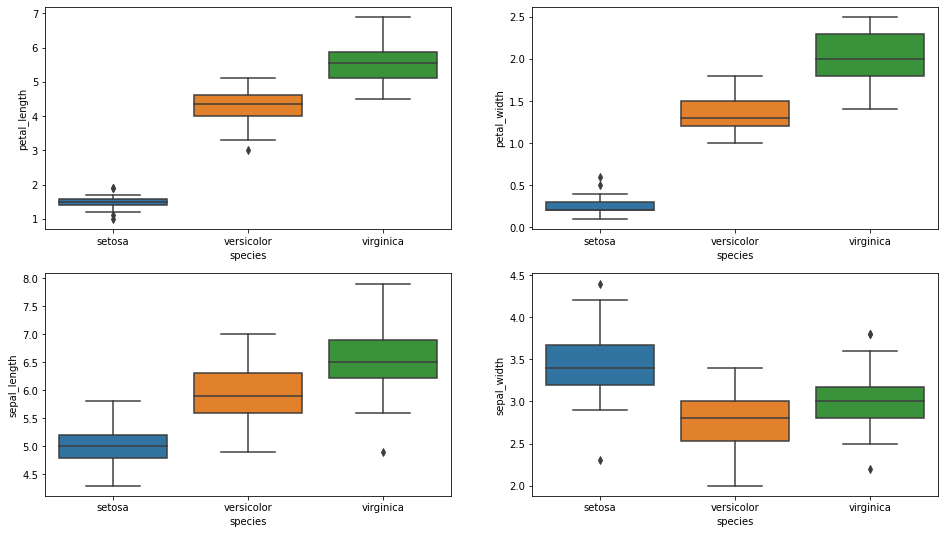

In [48]:
# Box plots to know about distribution

fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot(x="species", y="petal_length", data=df, orient="v", ax=axes[0,0])
sns.boxplot(x="species", y="petal_width", data=df, orient="v", ax=axes[0,1])
sns.boxplot(x="species", y="sepal_length", data=df, orient="v", ax=axes[1,0])
sns.boxplot(x="species", y="sepal_width", data=df, orient="v", ax=axes[1,1]);

#### Observation
1. Setosa is having smaller feature and less distributed
2. Versicolor is distributed in a average manner and average features
3. Virginica is highly distributed with large no .of values and features
4. Clearly the mean/ median values are being shown by each plots for various features(sepal length & width, petal length & width)

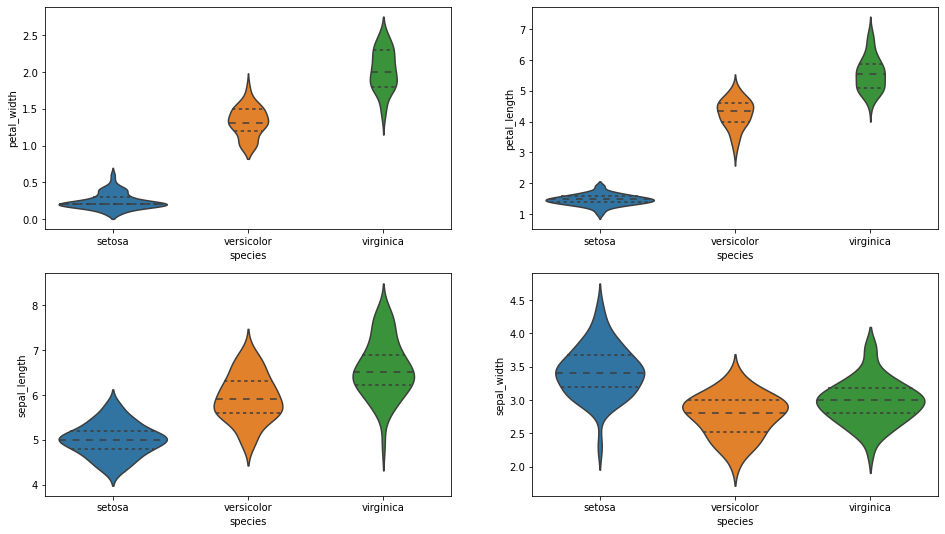

In [56]:
# Violin Plot for checking distribution

fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.violinplot(x="species", y="petal_width", data=df, orient="v", ax=axes[0,0], inner="quartile")
sns.violinplot(x="species", y="petal_length", data=df, orient="v", ax=axes[0,1], inner="quartile")
sns.violinplot(x="species", y="sepal_length", data=df, orient="v", ax=axes[1,0], inner="quartile")
sns.violinplot(x="species", y="sepal_width", data=df, orient="v", ax=axes[1,1], inner="quartile");

#### Observations
1. Setosa is having less distribution and density in case of petal length & width
2. Versicolor is distributed in a average manner and average features in case of petal length & width
3. Virginica is highly distributed with large no .of values and features in case of sepal length & width
4. High density values are depicting the mean/median values, for example: Iris Setosa has highest density at 5.0 cm ( sepal length feature) which is also the median value(5.0) as per the table

## Plot the Histogram & Probability Density Function

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

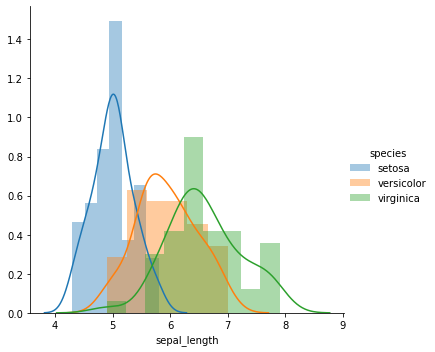

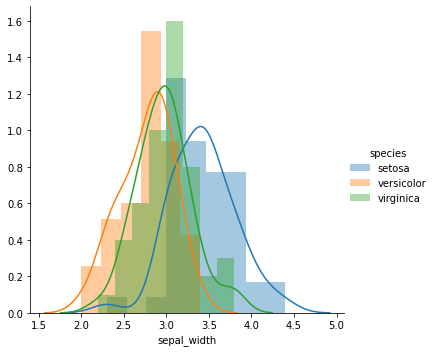

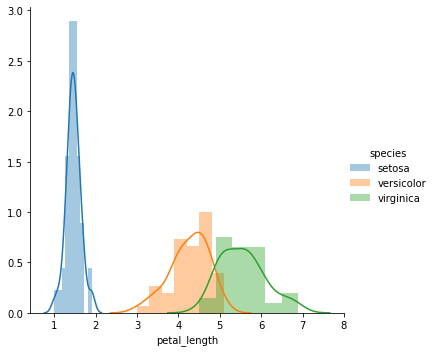

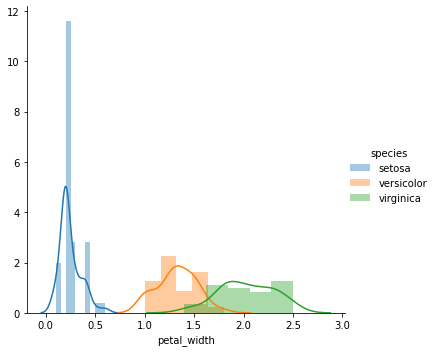

In [55]:
sns.FacetGrid(df, hue="species", height=5).map(sns.distplot, "sepal_length").add_legend()

sns.FacetGrid(df, hue="species", height=5).map(sns.distplot, "sepal_width").add_legend()

sns.FacetGrid(df, hue="species", height=5).map(sns.distplot, "petal_length").add_legend()

sns.FacetGrid(df, hue="species", height=5).map(sns.distplot, "petal_width").add_legend();

#### Observations
1. Plot 1 shows that there is a significant amount of overlap between the species on sepal length, so it is not an effective Classification feature

2. Plot 2 shows that there is even higher overlap between the species on sepal width, so it is not an effective Classification feature

3. Plot 3 shows that petal length is a good Classification feature as it clearly separates the species . The overlap is extremely less (between Versicolor and Virginica) , Setosa is well separated from the rest two

4. Just like Plot 3, Plot 4 also shows that petal width is a good Classification feature . The overlap is significantly less (between Versicolor and Virginica) , Setosa is well separated from the rest two